In [1]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
datasets = "..\\..\\datasets\\"
models = "..\\..\\models\\"

IMAGES_PATH = f"{datasets}/flickr30k/flickr30k_images/flickr30k_images"  # Directory with training images
CAPTIONS_PATH = f"{datasets}/flickr30k/flickr30k_images/results_validation.csv"  # Caption file
TEST_IMAGES_PATH = "..\\test_images"  # Directory with test images

In [3]:
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

from torch.nn.utils.rnn import pad_sequence
import torch

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


In [4]:
@torch.no_grad()
def generate_caption_transformer(image, encoder, decoder, vocab, max_len=30):
    encoder.eval()
    decoder.eval()

    bos = vocab.word2idx["<start>"]
    eos = vocab.word2idx["<end>"]

    image = image.unsqueeze(0).to(device)
    memory = encoder(image)  # [1, N, D]

    generated = torch.tensor([[bos]], device=device)

    for _ in range(max_len - 1):
        logits = decoder(memory, generated)      # [1, t, V]
        next_token = logits[:, -1].argmax(dim=-1, keepdim=True)  # [1,1]
        generated = torch.cat([generated, next_token], dim=1)

        if next_token.item() == eos:
            break

    words = []
    for idx in generated.squeeze(0).tolist():
        w = vocab.idx2word[idx]
        if w in ("<start>", "<pad>"):
            continue
        if w == "<end>":
            break
        words.append(w)

    return " ".join(words)

In [5]:
from model import TransformerEncoderViT
from model import TransformerDecoder

vocab = torch.load("models/vocab.pkl", weights_only=False)
encoder = TransformerEncoderViT(256).to(device)
decoder = TransformerDecoder(embed_size=256, vocab_size=len(vocab)).to(device)

encoder.load_state_dict(torch.load("models/encoder.pth", map_location=device))
decoder.load_state_dict(torch.load("models/decoder.pth", map_location=device))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


2861


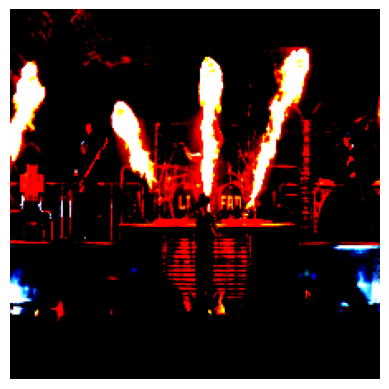

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Image: 6632464405.jpg
Caption: <unk> people are standing in a hot park <unk>

Ground Truth Captions: ['A rock concert in progress , with the two musicians and a singer performing as jets of flame shoot up from the stage .', 'A man is standing center stage with a microphone as flames shoot upward behind him .', 'A band dressed in black in front of flame throwing effects is performing .', 'Rammstein performing a stage show with high caliber pyrotechnics .', 'A musician performs on stage with pyrotechnic displays .']



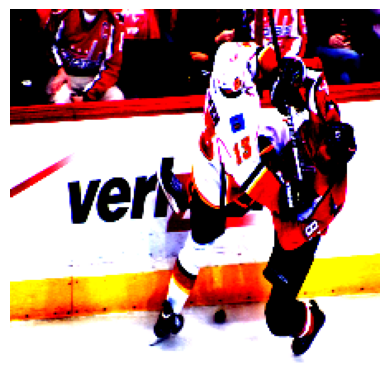

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


Image: 6633366731.jpg
Caption: <unk> hockey players are fighting in the ice <unk>

Ground Truth Captions: ['A hockey player in a white jersey shoves a player in a red jersey on the ice rink with a partial Verizon logo and spectators in the background .', 'Two men , one wearing a white hockey jersey and the other a red hockey jersey , playing hockey on an ice rink .', 'Two hockey players are fighting over a goal using their pucks on ice ground .', 'Hockey player in white and a hockey player in red fighting over the puck .', 'Two hockey players engaged in a scuffle in front of a Verizon sign .']



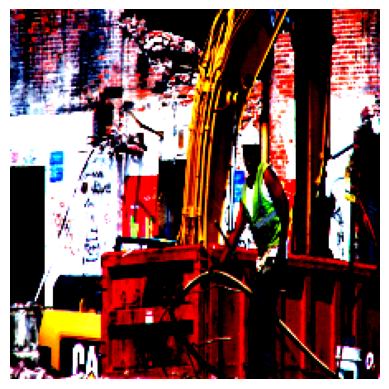

Image: 663377207.jpg
Caption: <unk> construction workers working on a building <unk>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.4134207].



Ground Truth Captions: ['A black man wearing a safety vest and hard hat is dumpster diving and appears to be holding a piece of electrical conduit .', 'A man in a hard hat is working near a dumpster .', 'A construction worker works near a bulldozer .', 'A construction worker posing for the camera .', 'The man with white hat is working so hard .']



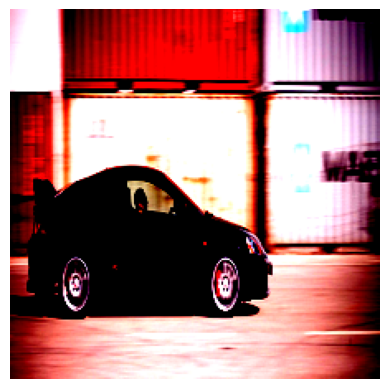

Image: 6634655583.jpg
Caption: <unk> car is driving through a car <unk>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].



Ground Truth Captions: ["A person is driving a black two-door sedan down a road next to a freight train 's cars .", 'A man drives a black car in front of several large metal shipping containers .', 'A man in a dark blue car drives past some storage trailers .', 'A man driving a small black car is racing down the road .', 'Man drives car next to shipping containers .']



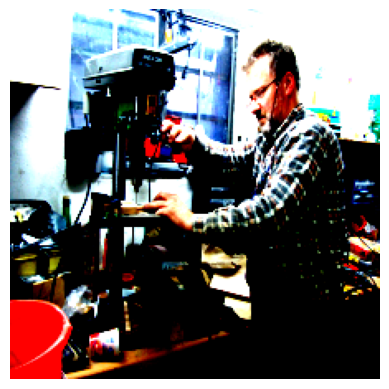

Image: 6635119569.jpg
Caption: <unk> man in a plaid shirt is using a tool <unk>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].



Ground Truth Captions: ['A middle-aged male carpenter uses a drill press in a crowded workshop .', 'A man with a plaid shirt is working on some wood in his workshop .', 'A man working on a project in his workshop .', 'a man in a checkered shirt doing woodwork', 'A man working in a cluttered workshop .']



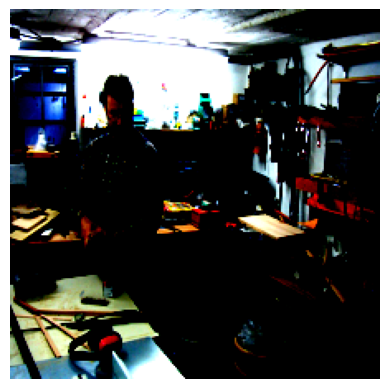

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0322802..2.64].


Image: 6635122929.jpg
Caption: <unk> man in a plaid shirt is working on a project <unk>

Ground Truth Captions: ['An older man dressed in blue overalls and glasses , is standing in a shop with many tools , holding several small pieces of wood .', 'An older man in flannel and bib overalls stands in his brightly lit workshop .', 'A man in a flannel shirt and denim overalls working with tools in a workshop .', 'A older man inside a workshop wearing glasses .', 'Man in overalls stands in workshop .']



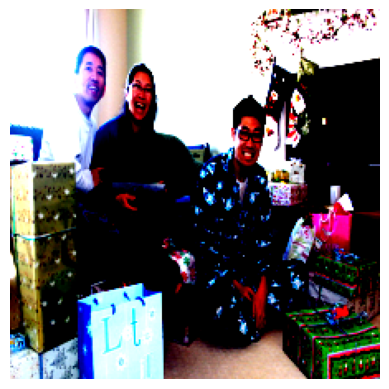

Image: 6635990951.jpg
Caption: <unk> group of people sitting in a room <unk>

Ground Truth Captions: ['A happy Asian family poses for a holiday picture in front of the fireplace .', 'A family sits on the couch and the floor among a number of holiday gifts .', 'Three people of Asian descent smile with gifts around them .', 'A family smiles and poses before they open presents .', 'Happy Asians receive presents during the holidays .']



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.1804092].


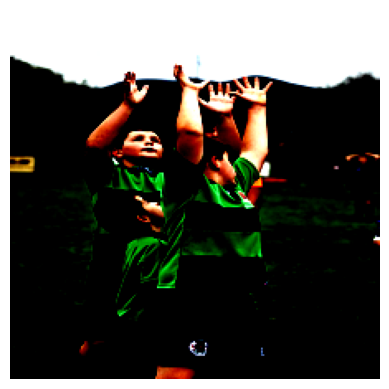

Image: 6636998629.jpg
Caption: <unk> man in a green shirt is holding a football <unk>

Ground Truth Captions: ['Three young boys in sports uniform anticipate catching a ball at the grass sports field .', 'Chubby boys raise their hands in the air while playing a sport .', 'There are three children in sports uniforms on a soccer field .', '3 boys are at the park raising their hands to the sky .', 'Young boys warm up before a soccer match .']



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0474076].


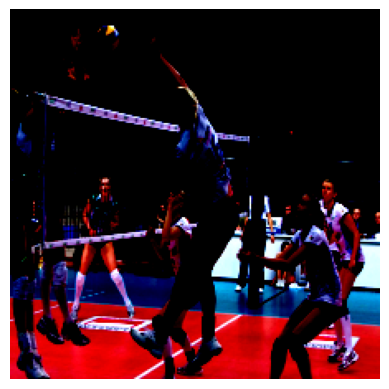

Image: 6638041153.jpg
Caption: <unk> women are playing volleyball <unk>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].



Ground Truth Captions: ['Two teams of women , one in blue and white and one in green and white , are playing volleyball .', 'Competing girls volleyball players attempt to control the ball in midair .', 'Two women try to block a spike while playing volleyball .', "There are two teams competing in a women 's volleyball game .", 'A game on women volleyball in a gymnasium .']



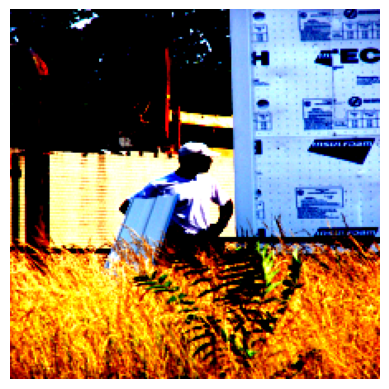

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5005665].


Image: 664228094.jpg
Caption: <unk> man in a white shirt is standing in front of a large building <unk>

Ground Truth Captions: ['A man in a white cap and shirt is working is looking at a construction project .', 'A construction working wearing a white hat is holding on to a piece of siding .', 'A man in a white t-shirt and white ball cap stands next to Insulfoam .', 'A black man looking at something located near a manufacture building .', 'A man is standing in a field with a green plant in it .']



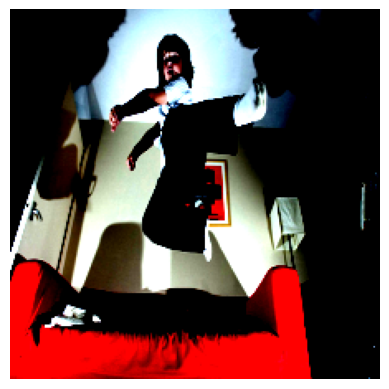

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.980906..2.64].


Image: 664341930.jpg
Caption: <unk> man in a white shirt is jumping off a couch <unk>

Ground Truth Captions: ['A child is performing a jump kick pose in midair over a red couch .', 'Little boy doing a flying kick in a lited room with shadows .', 'A child does a karate kick and jumps from a red couch .', 'The boy leaps of his bed with a karate kick .', 'The boy is bouncing on the red couch .']



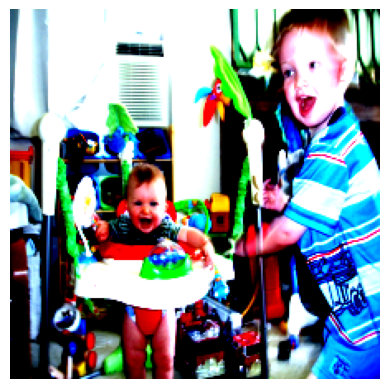

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].


Image: 664470170.jpg
Caption: <unk> baby in a blue shirt is playing with a toy <unk>

Ground Truth Captions: ['Two little boys are smiling and laughing while one is standing and one is in a bouncy seat .', 'A young boy and his baby brother get excited about picture taking .', 'A baby in a bouncy seat and a standing boy surrounded by toys .', 'A baby and a toddler are smiling whilst playing in a nursery .', 'A baby in a walker and an older child nearby .']



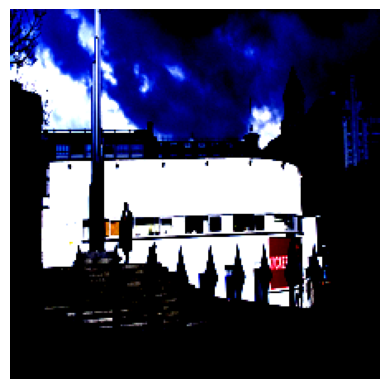

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Image: 66452145.jpg
Caption: <unk> people are walking along a street <unk>

Ground Truth Captions: ['A man wearing a dark suit and a red tie walks in front of a large , white , circular building and across a large set of concrete curved stairs .', 'A man stands outside by himself beside some old buildings and a brick street .', 'A man is standing near a large metal statue shaped like organ pipes .', 'A large white cruise ship in the background behind a black gate .', 'An individual is standing outside of a white building .']



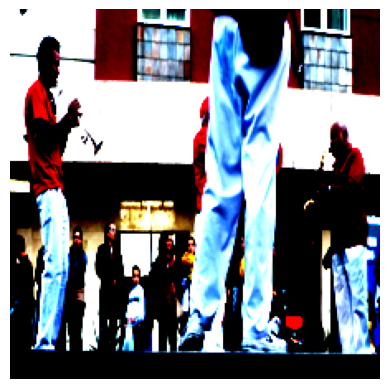

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Image: 6647902055.jpg
Caption: <unk> man in a red shirt is standing in front of a crowd <unk>

Ground Truth Captions: ['Four men in white and red play various instruments together on the sidewalk .', 'A band of musicians playing music in the streets all wearing red shirts .', 'Men dressed in red and white playing musical instruments .', 'Several men in matching outfits play music for onlookers .', 'There is not an image here .']



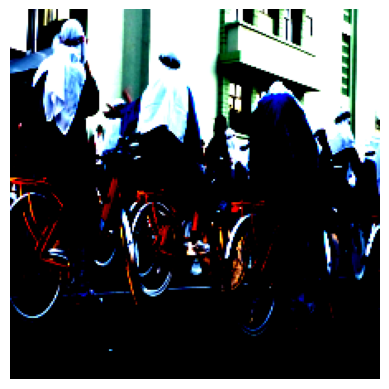

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781574..2.6051416].


Image: 6647904677.jpg
Caption: <unk> group of people riding bikes on a street <unk>

Ground Truth Captions: ['A group of people in blue Arabian robes and white headdresses is on yellow bicycles in the street in front of a tall building .', 'Several people , wearing blue robes and white keffiyehs , are riding yellow bicycles .', 'A group of people wearing blue and white dishdashas all riding orange bicycles .', 'Wearing a traditional blue robes , men ride down the street on bicycles .', 'Muslims riding their bicycles down a busy street .']



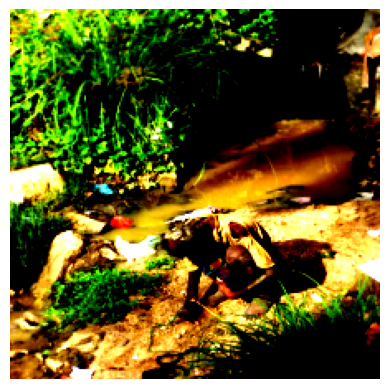

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].


Image: 6647909243.jpg
Caption: <unk> brown dog is walking through a river <unk>

Ground Truth Captions: ['An impoverished person , wearing a torn brown shirt and no shoes , is kneeling down along the banks of a trash infested body of water .', 'A skinny black child wearing a torn tan shirt is squatting beside a tiny , muddy pond while digging in the dirt with a small object .', 'A man crouches by the bank of a muddy stream , sifting through rocks and pebbles on the ground .', 'A famished person is sitting beside a trash filled stream .', 'A person playing with a rock next to some dirty water .']



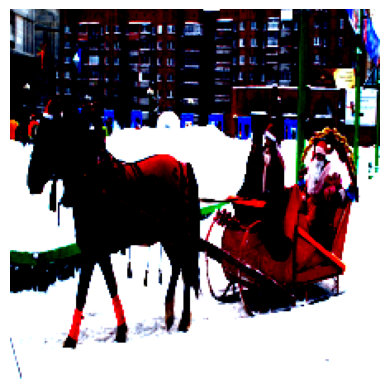

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.1171243].


Image: 6648587509.jpg
Caption: <unk> group of people are riding a sled through the snow <unk>

Ground Truth Captions: ["Someone dressed as Santa , Mrs. Claus , and two other people are riding in Santa 's sleigh , pulled by a horse , through a snow covered city .", "A black horse with a santa hat on top of it 's head pulling a sleigh in the snow with 4 people in the sleigh .", 'A family in a sleigh with Santa is pulled behind a horse .', 'A horse carriage is carrying two santas through the snow', 'A winter sleigh ride with Santa .']



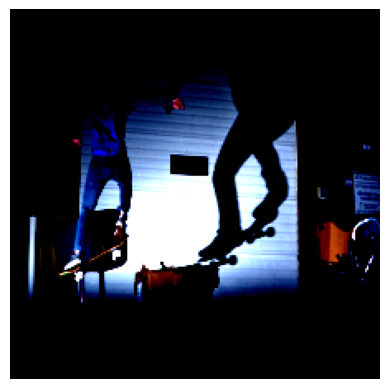

Image: 6650775357.jpg
Caption: <unk> man is skateboarding on a skateboard <unk>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..2.6051416].



Ground Truth Captions: ['A man in a blue hooded sweatshirt on his skateboard is jumping over an obstacle in a garage .', 'A skateboarder wearing a blue shirt leaps into the air on his skateboard .', 'Guy in jeans skateboarding in the middle of the night a warehouse .', 'A man in a blue shirt is jumping his skateboard in a garage .', 'Skateboarder practices at night .']



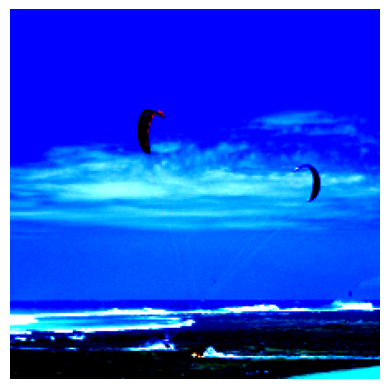

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].


Image: 6651302933.jpg
Caption: <unk> person is parasailing on a beach <unk>

Ground Truth Captions: ['Two people go parasailing on the ocean with a beautiful scenic view in the background .', 'Two people come close to one another while they kite surf in the ocean on a sunny day .', 'Two people crossing paths in the ocean while parasailing during a clear blue day .', 'Two people crossing by each other while kite surfing .', 'A pair of people parasailing on a sunny day .']



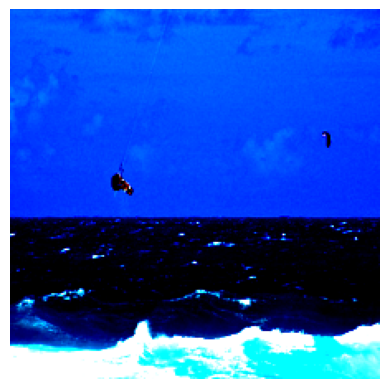

Image: 6651304481.jpg
Caption: <unk> man is surfing on a wave <unk>

Ground Truth Captions: ['These fine people are kite surfing , but doing it in the background of this photo .', 'Two para jumpers are gliding through the air over a beautiful blue ocean .', 'Birds flying above the rolling waves of the ocean .', 'Person parasailing with a board in the ocean .', 'A parachutist landing in the ocean .']



In [27]:
#  test the model on a few images
import os
import matplotlib.pyplot as plt
from PIL import Image
import csv


image_captions = {}
count =0
with open(CAPTIONS_PATH, "r", encoding="utf-8") as f:
# reader = csv.reader(f)
# next(reader)  # skip header: image,caption

        for line in f:
                line = line.strip()
                # Skip header
                if line.startswith("image_name"):
                        continue

                # Split by '|'
                parts = [p.strip() for p in line.split("|")]
                if len(parts) < 3:
                        continue

                img_name,_, caption = parts
                if img_name not in image_captions:
                        image_captions[img_name] = []
                image_captions[img_name].append(caption)

print(len(image_captions.keys()))

for img_name in list(image_captions.keys())[:20]:
        img_path = f"{IMAGES_PATH}/{img_name}"
        image = Image.open(img_path).convert("RGB")

        image = transform(image)
        plt.imshow(image.permute(1, 2, 0).cpu().numpy())
        plt.axis('off')
        plt.show()

        caption = generate_caption_transformer(image, encoder, decoder, vocab)
        print(f"Image: {img_name}\nCaption: {caption}\n")
        print(f"Ground Truth Captions: {image_captions[img_name]}\n")
